**Mounting Google Drive to fetch the data**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Importing the Required Libraries**

In [2]:
!pip install keras==3.3.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [3]:
import os
import shutil
import time
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.model_selection import train_test_split
from keras import layers,models
import tensorflow as tf
from keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_auc_score,confusion_matrix,classification_report

**Defining and Training Transfer Learning Model Function and loading weights**

In [4]:
# model = Sequential()
# model.add(MobileNetV2(include_top=False, pooling='avg', weights='imagenet',input_shape=(224,224,3)))
# model.add(Dense(1, activation='sigmoid'))
# model.layers[0].trainable = False
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.built = True
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Auth Files/my_model.keras')

**Setting Up the Firebase to trigger alerts in the mobile application**

In [5]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import firestore

# /content/gdrive/MyDrive/Auth files/wireless-sensor-network-fyp-firebase-adminsdk-f1x2g-c21d90d586.json
cred = credentials.Certificate('/content/gdrive/MyDrive/Auth Files/wireless-sensor-network-fyp-firebase-adminsdk-f1x2g-c21d90d586.json')
firebase_admin.initialize_app(cred)

mydb = firestore.client()

In [6]:
def check_image():
  img = []
  # Fetch all the available images
  path_ = glob.glob('/content/gdrive/MyDrive/Data Collected Raspberry pi/*.jpg')
  for i in path_:
      n = cv2.imread(i)
      n = cv2.resize(n,(224,224))
      plt.imshow(n)
      plt.show()
      img.append(n)

  # make sure we have atleast one image to proceed further
  if len(img) != 0:
    X_test = np.asarray(img)/255
    # predict the classes for the given image
    predicted = (model.predict(X_test) > 0.5).astype("int32")
    # predicted = model.predict_classes(X_test)
    display(predicted)

    # iterate through each prediction and check that if weed is found
    for prediction in predicted:
      # if weed is found
      if prediction == 0:
        # store an entry in the firestore to let the user know about it
        time_now = time.time()
        doc = mydb.collection(u'alerts').document(str(time_now))
        doc.set({
          u'time_stamp': firestore.SERVER_TIMESTAMP,
          u'message': u'Weed found'
        })

    # move the checked images to another directory
    source = "/content/gdrive/MyDrive/Data Collected Raspberry pi/"
    dest = "/content/gdrive/MyDrive/Image_checked"
    for f in os.listdir(source):
      try:
        shutil.move(source + f, dest)
      except:
        shutil.move(source + f, dest+"(1)")

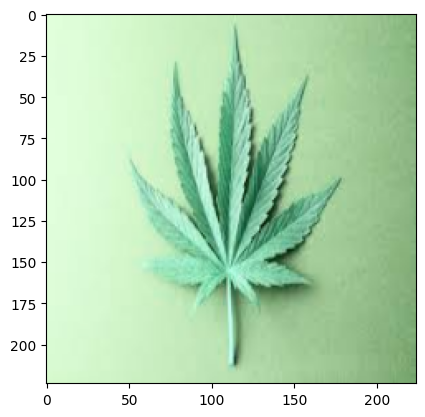

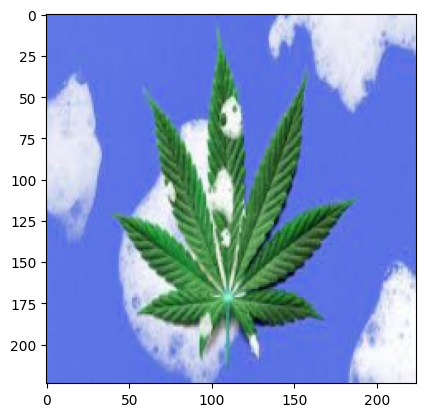

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


array([[0],
       [0]], dtype=int32)

In [ ]:
while True:
  check_image()
  time.sleep(10)